## 필기체 데이터를 분류하는 CNN 신경망

In [11]:
#1. 필요한 패키지 가져오기
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical 

In [25]:
tf.random.set_seed(777)
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
print(x_train.shape)  # (60000, 28, 28)
print(x_test.shape)   # (10000, 28, 28)

(60000, 28, 28)
(10000, 28, 28)


In [27]:
# 위의 데이터에는 색조를 나타내는 차원이 없음. 
# 색조 차원 추가 reshape 
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1) 
print(x_train.shape)  # (60000, 28, 28, 1)
print(x_test.shape)   # (10000, 28, 28, 1)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [29]:
#2. 정규화 진행
x_train = x_train / 255
x_test = x_test / 255 

In [31]:
#3. 정답 데이터 준비
# 하나의 숫자를 One hot encoding : 4 --> 0 0 0 0 1 0 0 0 0 0 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### model 1

In [37]:
#4. 3층 신경망 첫 번째 모델 구성 : SGD 
model = Sequential()
model.add(Conv2D(100, kernel_size=(5,5), input_shape=(28,28,1), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Flatten())
model.add(Dense(50, activation = 'sigmoid', input_shape = (784, )))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))

#5. 모델을 설정 (경사하강법, 오차함수)
model.compile(optimizer = 'SGD',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

# 6. 모델 훈련
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 100,
                    validation_data = (x_test, y_test)
                   )

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - acc: 0.1121 - loss: 2.3632 - val_acc: 0.2112 - val_loss: 2.2731
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - acc: 0.2704 - loss: 2.2540 - val_acc: 0.5025 - val_loss: 2.1484
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - acc: 0.5118 - loss: 2.0739 - val_acc: 0.6599 - val_loss: 1.7903
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - acc: 0.6618 - loss: 1.6929 - val_acc: 0.7476 - val_loss: 1.3991
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - acc: 0.7561 - loss: 1.3196 - val_acc: 0.8154 - val_loss: 1.0882
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - acc: 0.8148 - loss: 1.0328 - val_acc: 0.8474 - val_loss: 0.8687
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - acc: 0.8465 - loss: 0.8333 - val_acc: 0.8695 - val_loss: 0.7177
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - acc: 0.8655 - loss: 0.6964 - val_acc: 0.8807 - val_loss: 0.6132
Epoch 9/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9346 - loss: 0.2425


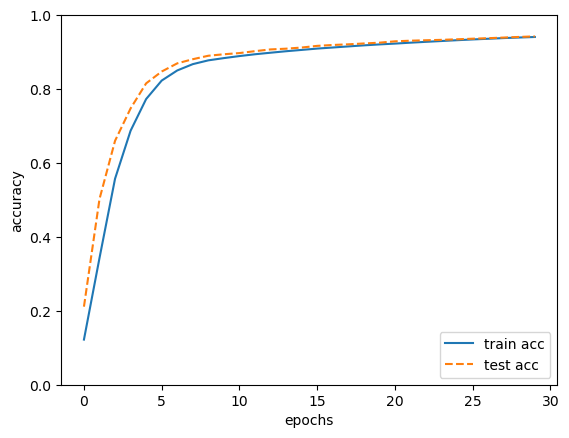

In [43]:
#7. 첫 번째 모델 평가 
model.evaluate(x_test, y_test)
train_acc_list = history.history['acc']
train_acc_list

test_acc_list = history.history['val_acc']
test_acc_list

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

## model 2

In [51]:
#1. 필요한 패키지 가져오기
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.callbacks import EarlyStopping 

tf.random.set_seed(777)
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
# print(x_train.shape)  # (60000, 28, 28)
# print(x_test.shape)   # (10000, 28, 28)

# 위의 데이터에는 색조를 나타내는 차원이 없음. 
# 색조 차원 추가 reshape 
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1) 
# print(x_train.shape)  # (60000, 28, 28, 1)
# print(x_test.shape)   # (10000, 28, 28, 1)

#2. 정규화 진행
x_train = x_train / 255
x_test = x_test / 255 

#3. 정답 데이터 준비
# 하나의 숫자를 One hot encoding : 4 --> 0 0 0 0 1 0 0 0 0 0 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#4. 3층 신경망 두 번째 모델 구성 : SGD, 배치정규화, 드롭아웃 
model2 = Sequential()
model2.add(Conv2D(100, kernel_size=(5,5), input_shape=(28,28,1), padding='same',activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model2.add(Dropout(0.25))

# 완전 연결 계층 
model2.add(Flatten())
model2.add(Dense(50, activation = 'sigmoid', input_shape = (784, )))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Dense(50, activation = 'sigmoid'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Dense(10, activation = 'softmax'))

#5. 두 번째 모델을 설정 (경사하강법, 오차함수)
model2.compile(optimizer = 'SGD',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#6. 두 번째 모델 훈련
history = model2.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 100,
                    validation_data = (x_test, y_test),
                    callbacks = [early_stopping]
                   )

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 70s 115ms/step - acc: 0.8501 - loss: 0.5386 - val_acc: 0.9662 - val_loss: 0.1528
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 74s 124ms/step - acc: 0.9626 - loss: 0.1516 - val_acc: 0.9815 - val_loss: 0.0591
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 74s 124ms/step - acc: 0.9718 - loss: 0.1083 - val_acc: 0.9832 - val_loss: 0.0513
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 69s 116ms/step - acc: 0.9778 - loss: 0.0876 - val_acc: 0.9859 - val_loss: 0.0437
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 74s 123ms/step - acc: 0.9803 - loss: 0.0750 - val_acc: 0.9860 - val_loss: 0.0412
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 71s 119ms/step - acc: 0.9813 - loss: 0.0677 - val_acc: 0.9856 - val_loss: 0.0424
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 71s 118ms/step - acc: 0.9841 - loss: 0.0607 - val_acc: 0.9883 - val_loss: 0.0353
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 67s 112ms/step - acc: 0.9850 - loss: 0.0559 - val_acc: 0.9871 - val_loss: 0.0371
Epoch 9/30
600/600 ━━━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.9894 - loss: 0.0341


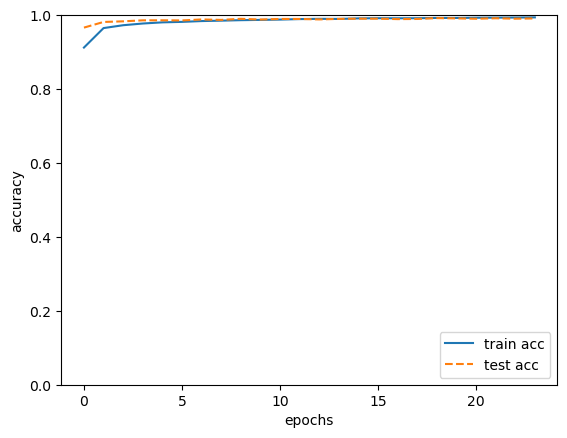

In [53]:
# 7. 모델 평가
model2.evaluate(x_test, y_test)

train_acc_list = history.history['acc']
test_acc_list = history.history['val_acc']

import matplotlib.pyplot as plt
import numpy as np
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()